# Altezza e Diametro medio dei QD nel campione C240920

C240920_QDs.txt è organizzato in due colonne: z_max e r_eq

### Semplice media

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

# Leggi i file
file = "data/C240920_QDs.txt"

# Carica i dati
data = np.loadtxt(file)

# Estrai le colonne
altezza, diametro = data[:, 0], data[:, 1]

altezza_media = np.mean(altezza - 3.7e-09) 
diametro_medio = np.mean(diametro) * 2

# all'altezza va sottratto 3.7 nm che è l'altezza del substrato
print('altezza media:', altezza_media )
print('diametro medio:', diametro_medio)
print('aspect ratio:', altezza_media/diametro_medio)

altezza media: 2.610879666666667e-09
diametro medio: 7.375742222222222e-08
aspect ratio: 0.03539819570700833


### Istogramma e fit gaussiano

#### Altezza

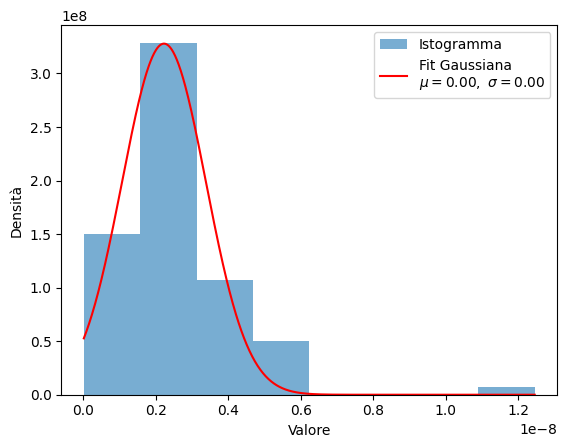

Altezza media: 2.2257364311868042e-09 ± 1.1564437580875305e-09


In [35]:

# Funzione gaussiana per il fit
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Crea l'istogramma
n_bin = int(np.ceil(np.log2(len(altezza))) + 1)
counts, bin_edges = np.histogram(altezza-3.7e-09, bins=n_bin, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit della gaussiana ai dati dell'istogramma
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[np.mean(altezza-3.7e-09), np.std(altezza-3.7e-09), max(counts)])

# Parametri della gaussiana
mu, sigma, A = popt

# Disegna l'istogramma e la gaussiana fittata
plt.hist(altezza-3.7e-09, bins=n_bin, density=True, alpha=0.6, label='Istogramma')
x = np.linspace(min(altezza-3.7e-09), max(altezza-3.7e-09), 1000)
plt.plot(x, gaussian(x, *popt), 'r-', label=f'Fit Gaussiana\n$\mu={mu:.2f},\ \sigma={sigma:.2f}$')
plt.xlabel('Valore')
plt.ylabel('Densità')
#plt.xlim(-0.1,1.3)
plt.legend()
plt.show()

print('Altezza media:', mu, '±', sigma)

#### Raggio

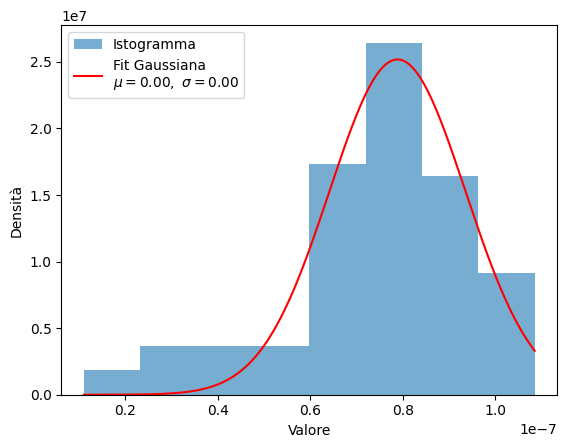

Diametro medio: 7.884662505963891e-08 ± 1.4719478226203485e-08


In [36]:
# Funzione gaussiana per il fit
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Crea l'istogramma
n_bin = int(np.ceil(np.log2(len(diametro))) + 1)
counts, bin_edges = np.histogram(diametro*2, bins=n_bin, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit della gaussiana ai dati dell'istogramma
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[np.mean(diametro*2), np.std(diametro*2), max(counts)])

# Parametri della gaussiana
mu, sigma, A = popt

# Disegna l'istogramma e la gaussiana fittata
plt.hist(diametro*2, bins=n_bin, density=True, alpha=0.6, label='Istogramma')
x = np.linspace(min(diametro*2), max(diametro*2), 1000)
plt.plot(x, gaussian(x, *popt), 'r-', label=f'Fit Gaussiana\n$\mu={mu:.2f},\ \sigma={sigma:.2f}$')
plt.xlabel('Valore')
plt.ylabel('Densità')
#plt.xlim(-0.1,1.3)
plt.legend()
plt.show()

print('Diametro medio:', mu, '±', sigma)